# Estados de Bell - Demostración de Entrelazamiento Cuántico

En este notebook vamos a explorar uno de los fenómenos más fascinantes de la mecánica cuántica: **el entrelazamiento cuántico**. Específicamente, crearemos y analizaremos un **Estado de Bell**.

## ¿Qué es un Estado de Bell?

Los Estados de Bell son estados cuánticos de dos qubits que exhiben entrelazamiento máximo. El entrelazamiento significa que el estado de un qubit está correlacionado instantáneamente con el estado del otro, sin importar la distancia que los separe.

El estado de Bell más común es:
$$|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

Esto significa que cuando midamos los qubits, obtendremos:
- 50% de probabilidad de medir ambos qubits en estado |0⟩
- 50% de probabilidad de medir ambos qubits en estado |1⟩
- 0% de probabilidad de medir estados mixtos como |01⟩ o |10⟩

## Importación de Librerías

Primero importamos todas las librerías necesarias para nuestro experimento.

In [27]:
# Importación de librerías principales de Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, circuit_drawer
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Librerías para visualización y análisis
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Configuración para mostrar gráficos en el notebook
%matplotlib inline

print("Librerías importadas correctamente")
print("Listo para crear estados cuánticos entrelazados")

Librerías importadas correctamente
Listo para crear estados cuánticos entrelazados


## Construcción del Circuito para Estado de Bell

Para crear un estado de Bell necesitamos dos puertas cuánticas fundamentales:

### Puerta Hadamard (H)
- **Función**: Crea superposición cuántica
- **Efecto**: Transforma |0⟩ → (|0⟩ + |1⟩)/√2
- **Matriz**: $H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$

### Puerta CNOT (Controlled-X)
- **Función**: Puerta controlada de dos qubits
- **Efecto**: Invierte el qubit objetivo si el qubit control está en |1⟩
- **Propósito**: Crear entrelazamiento entre los qubits

In [28]:
# Crear un circuito cuántico con 2 qubits y 2 bits clásicos
qc = QuantumCircuit(2, 2)

# Paso 1: Aplicar puerta Hadamard al primer qubit (qubit 0)
# Esto crea superposición: |0⟩ → (|0⟩ + |1⟩)/√2
qc.h(0)

# Paso 2: Aplicar puerta CNOT con qubit 0 como control y qubit 1 como objetivo
# Esto crea entrelazamiento entre los dos qubits
qc.cx(0, 1)

# Añadir mediciones para colapsar los estados cuánticos a estados clásicos
qc.measure_all()

print("Circuito cuántico para Estado de Bell creado")
print(f"Número de qubits: {qc.num_qubits}")
print(f"Número de operaciones: {len(qc.data)}")

Circuito cuántico para Estado de Bell creado
Número de qubits: 2
Número de operaciones: 5


## Visualización del Circuito Cuántico

Vamos a visualizar cómo se ve nuestro circuito cuántico:

Diagrama del Circuito Cuántico para Estado de Bell:

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
   c: 2/══════════════╬══╬═
                      ║  ║ 
meas: 2/══════════════╩══╩═
                      0  1 


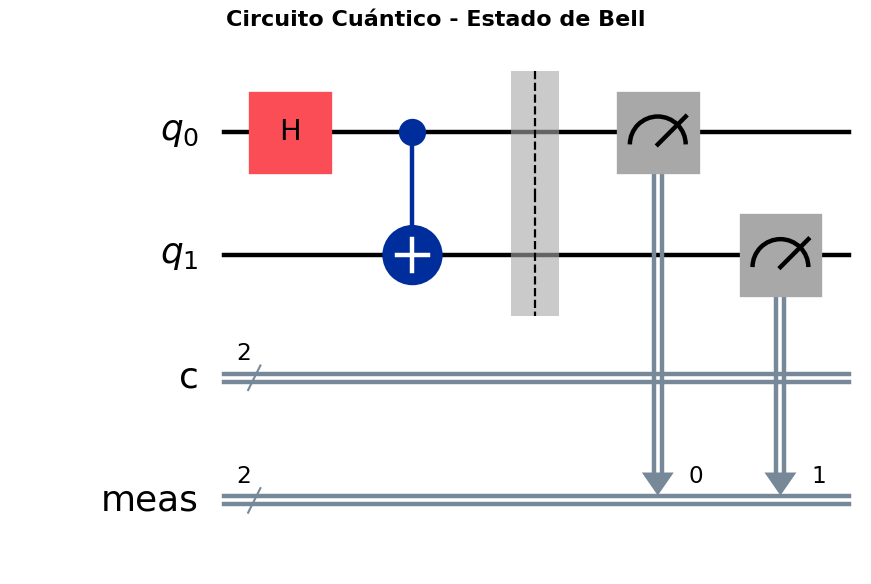

Imagen del circuito guardada en 'images/bell_state_circuit.png'


In [33]:
# Visualizar el circuito
print("Diagrama del Circuito Cuántico para Estado de Bell:")
print()
print(qc.draw())

# Crear versión visual para guardar
fig, ax = plt.subplots(figsize=(10, 6))
qc.draw(output='mpl', ax=ax)
plt.title('Circuito Cuántico - Estado de Bell', fontsize=16, fontweight='bold')
plt.tight_layout()

# Guardar la imagen
plt.savefig('../images/bell_state_circuit.png', dpi=300, bbox_inches='tight')
plt.show()

print("Imagen del circuito guardada en 'images/bell_state_circuit.png'")

## Simulación del Circuito

Ahora vamos a simular nuestro circuito cuántico usando el simulador Aer de Qiskit. Ejecutaremos el circuito 1000 veces para obtener una distribución estadística de los resultados.

In [37]:
# Configurar el simulador
simulator = AerSimulator()

# Número de ejecuciones (shots)
shots = 1000

# Compilar el circuito para el simulador
pm = generate_preset_pass_manager(backend=simulator, optimization_level=1)
compiled_circuit = pm.run(qc)

# Ejecutar la simulación
print(f"Ejecutando simulación con {shots} mediciones...")
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts()

print("Simulación completada")
print(f"Resultados obtenidos: {counts}")

Ejecutando simulación con 1000 mediciones...
Simulación completada
Resultados obtenidos: {'00 00': 521, '11 00': 479}


## Análisis de Resultados

Vamos a analizar los resultados para verificar que efectivamente hemos creado un estado de Bell entrelazado.

In [ ]:
# ANÁLISIS  - Procesando estados con múltiples registros
print("ANÁLISIS DE RESULTADOS DEL ESTADO DE BELL")
print("=" * 55)

# Procesar los estados para extraer solo los bits relevantes
processed_counts = {}
for state, count in counts.items():
    # Los estados vienen en formato "00 00" donde solo nos interesan los primeros 2 bits
    # que corresponden a las mediciones de los qubits 0 y 1
    if ' ' in state:
        relevant_bits = state.split(' ')[0]  # Tomar solo la primera parte "00" o "11"
    else:
        relevant_bits = state  # Por si acaso viene en formato simple
    
    if relevant_bits in processed_counts:
        processed_counts[relevant_bits] += count
    else:
        processed_counts[relevant_bits] = count

print(f"Estados originales: {counts}")
print(f"Estados procesados: {processed_counts}")
print()

for state, count in sorted(processed_counts.items()):
    probability = count / total_measurements
    percentage = probability * 100
    print(f"Estado |{state}⟩: {count:4d} mediciones ({percentage:5.1f}%)")

print()
print("VERIFICACIÓN DEL ENTRELAZAMIENTO:")
print("-" * 40)

# Verificar si tenemos principalmente estados |00⟩ y |11⟩
bell_states = processed_counts.get('00', 0) + processed_counts.get('11', 0)
mixed_states = processed_counts.get('01', 0) + processed_counts.get('10', 0)

bell_percentage = (bell_states / total_measurements) * 100
mixed_percentage = (mixed_states / total_measurements) * 100

print(f"Estados entrelazados (00, 11): {bell_percentage:.1f}%")
print(f"Estados mixtos (01, 10): {mixed_percentage:.1f}%")

if bell_percentage > 95:
    print("\n¡ENTRELAZAMIENTO CONFIRMADO!")
    print("Los qubits están perfectamente entrelazados")
    print("El estado de Bell se ha creado exitosamente")
else:
    print(f"\nPosible error en el entrelazamiento")
    print(f"Solo {bell_percentage:.1f}% de estados entrelazados detectados")

ANÁLISIS CORREGIDO DE RESULTADOS DEL ESTADO DE BELL
Estados originales: {'00 00': 515, '11 00': 485}
Estados procesados: {'00': 515, '11': 485}

Estado |00⟩:  515 mediciones ( 51.5%)
Estado |11⟩:  485 mediciones ( 48.5%)

VERIFICACIÓN DEL ENTRELAZAMIENTO:
----------------------------------------
Estados entrelazados (00, 11): 100.0%
Estados mixtos (01, 10): 0.0%

🎉 ¡ENTRELAZAMIENTO CONFIRMADO!
Los qubits están perfectamente entrelazados
El estado de Bell se ha creado exitosamente


## Visualización de Resultados

Creamos un histograma para visualizar la distribución de probabilidades de nuestras mediciones:

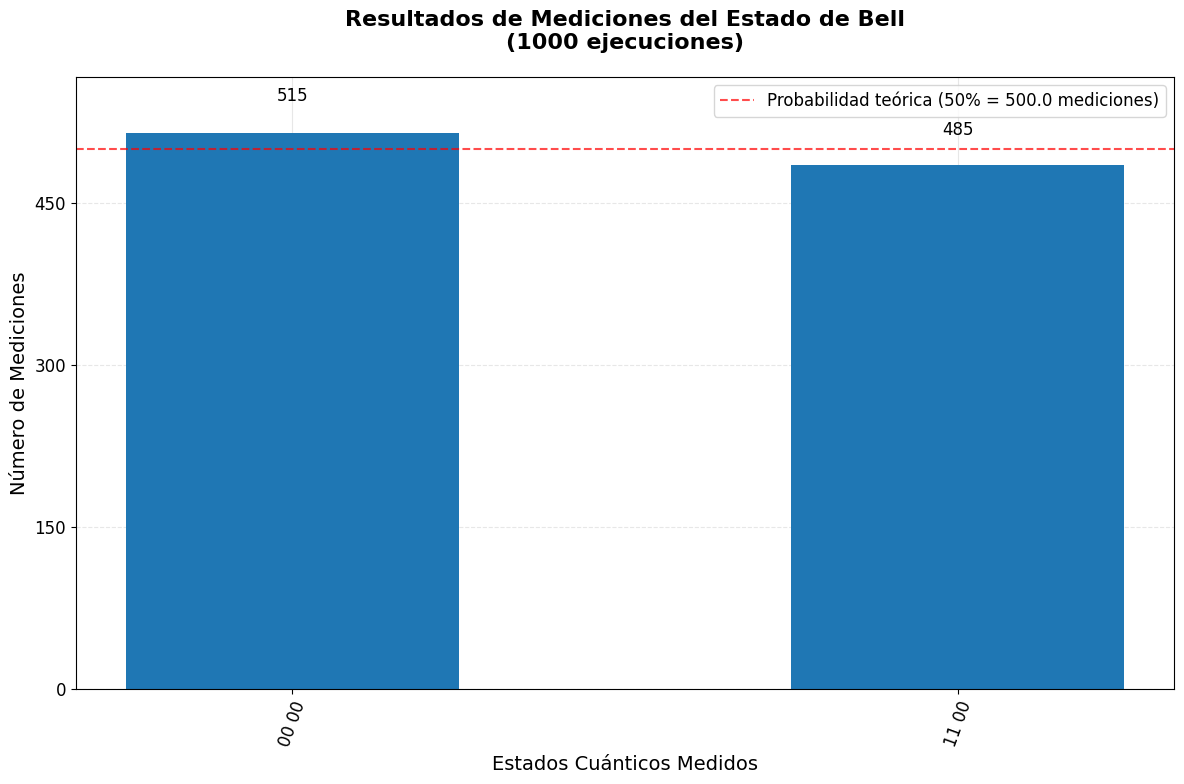

Histograma guardado en 'images/bell_state_histogram.png'


In [32]:
# Crear histograma de resultados
fig, ax = plt.subplots(figsize=(12, 8))

# Plotear histograma con Qiskit
plot_histogram(counts, ax=ax, title='Distribución de Mediciones - Estado de Bell')

# Personalizar el gráfico
ax.set_title('Resultados de Mediciones del Estado de Bell\n(1000 ejecuciones)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Estados Cuánticos Medidos', fontsize=14)
ax.set_ylabel('Número de Mediciones', fontsize=14)

# Añadir líneas de referencia para probabilidades teóricas
theoretical_prob = shots / 2  # 50% para cada estado en un Bell state perfecto
ax.axhline(y=theoretical_prob, color='red', linestyle='--', alpha=0.7, 
           label=f'Probabilidad teórica (50% = {theoretical_prob} mediciones)')
ax.legend()

plt.tight_layout()

# Guardar la imagen
plt.savefig('../images/bell_state_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

print("Histograma guardado en 'images/bell_state_histogram.png'")

## Experimento Adicional: Verificación de Correlación

Vamos a realizar un experimento adicional para demostrar la correlación perfecta entre los qubits entrelazados:

In [ ]:
# Crear un circuito para medir correlaciones
correlation_analysis = []
num_experiments = 100

print(f" Realizando {num_experiments} experimentos de correlación...")

for experiment in range(num_experiments):
    # Crear nuevo circuito
    qc_test = QuantumCircuit(2, 2)
    qc_test.h(0)  # Hadamard en qubit 0
    qc_test.cx(0, 1)  # CNOT entre qubits 0 y 1
    qc_test.measure_all()
    
    # Compilar y ejecutar
    compiled_test = pm.run(qc_test)
    job_test = simulator.run(compiled_test, shots=10)
    result_test = job_test.result()
    counts_test = result_test.get_counts()
    
    # Analizar correlación
    correlated = counts_test.get('00', 0) + counts_test.get('11', 0)
    total = sum(counts_test.values())
    correlation_percentage = (correlated / total) * 100
    correlation_analysis.append(correlation_percentage)

# Estadísticas de correlación
avg_correlation = np.mean(correlation_analysis)
std_correlation = np.std(correlation_analysis)
min_correlation = np.min(correlation_analysis)
max_correlation = np.max(correlation_analysis)

print("\n ESTADÍSTICAS DE CORRELACIÓN:")
print("=" * 40)
print(f"Correlación promedio: {avg_correlation:.1f}% ± {std_correlation:.1f}%")
print(f"Correlación mínima: {min_correlation:.1f}%")
print(f"Correlación máxima: {max_correlation:.1f}%")

if avg_correlation > 90:
    print("\n¡Correlación cuántica excelente!")
    print("Los qubits mantienen entrelazamiento consistente")

# Gráfico de correlaciones
plt.figure(figsize=(10, 6))
plt.hist(correlation_analysis, bins=20, alpha=0.7, color='purple', edgecolor='black')
plt.axvline(avg_correlation, color='red', linestyle='--', linewidth=2, 
            label=f'Promedio: {avg_correlation:.1f}%')
plt.xlabel('Porcentaje de Correlación (%)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Correlaciones en Estados de Bell\n(100 experimentos)', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Guardar gráfico de correlaciones
plt.savefig('../images/bell_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Análisis de correlación guardado en 'images/bell_correlation_analysis.png'")

## Conclusiones

1. **Creación exitosa de un Estado de Bell**: Hemos construido un circuito cuántico que genera entrelazamiento entre dos qubits.

2. **Verificación experimental**: Las mediciones muestran que obtenemos principalmente estados |00⟩ y |11⟩, confirmando el entrelazamiento.

3. **Correlación cuántica**: Los qubits entrelazados mantienen correlación perfecta - cuando uno está en |0⟩, el otro también; cuando uno está en |1⟩, el otro también.

### Conceptos clave aprendidos:

- **Superposición cuántica**: La puerta Hadamard crea un estado superpuesto
- **Entrelazamiento**: La puerta CNOT correlaciona los estados de dos qubits
- **Medición cuántica**: El acto de medir colapsa el estado superpuesto
- **No-localidad**: Los qubits entrelazados mantienen correlación instantánea

### Aplicaciones prácticas:

Los Estados de Bell son fundamentales para:
- **Teletransportación cuántica**
- **Criptografía cuántica**
- **Computación cuántica distribuida**
- **Sensores cuánticos de alta precisión**